In [1]:
!pip install ~/ogip ~/oda-function
import matplotlib as mpl

mpl.use('Agg')

from matplotlib import pylab as plt
from astropy.io import fits
import ogip
import ogip.core

Defaulting to user installation because normal site-packages is not writeable
Processing /home/savchenk/ogip
  Preparing metadata (setup.py) ... done
Processing /home/savchenk/oda-function
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ogip: filename=ogip-0.2.1-py2.py3-none-any.whl size=10766 sha256=c8a22dac8bfcc4825d6ba22504feed01dee0c821a071b2eeb31e5300670c0a7c
  Stored in directory: /tmp/pip-ephem-wheel-cache-bd2447_0/wheels/f8/97/65/0e1bfa07b3a97fe1ae12e1219802bb37257771039da73d4ec0
  Created wheel for odafunction: filename=odafunction-0.1.0-py3-none-any.whl size=12407 sha256=a09f0b00f7e88778459cb15d6f44b6d9bda3bb782f500beb26e6836583c17935
  Stored in directory: /home/savchenk/.cache/pip/wheels/96/35/7b/85cd23eaaab08f24f515c306e6010bec7039102db4202739be
Successfully built ogip odafunction
  Attempting uninstall: ogip
    Found existing installation: ogip 0.2.1
    Uninstallin

In [2]:
# oda:version "v0.1.29"

focus_obs_name='r25589'
sampler_steps=50


* Subject: 	Re: GRB221009A
* Date: 	Fri, 28 Oct 2022 17:37:00 +0200
* From: 	ejourdain <ejourdain@irap.omp.eu>
* To: 	Volodymyr Savchenko [UNIGE] <Volodymyr.Savchenko@unige.ch>
* CC: 	Jean-Pierre Roques <jroques@irap.omp.eu>, Carlo Ferrigno <carlo.ferrigno@unige.ch>


The spectrum in attachement is averaged over rev 2558 and 2559. Adding rev 2560 decreases the signal to noise ratio (which is not high anyway)

The two broad channels below and above 551 keV may be used to test scenarii with broad shifted annihilation feature if relevant.


 


In [3]:
from odafunction.executors import default_execute_to_value
from odafunction.func.urifunc import URIipynbFunction, URIValue

# focus_obs_name='r25589'

# TODO: set version restriction here
# TODO: make nb2workflow store in remote storages
# TODO: make possible to disrupt equivalence with indications
# TODO: make common fd/fc depending on

v = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/grbbase.ipynb")(focus_obs_name=focus_obs_name), valueclass=URIValue, cached=True)

In [4]:
from astropy.time import Time
T0 = Time(v['output_values']['data']['T0_isot'])
T0_ijd = T0.mjd - 51544.5

In [5]:
v['output_values']['data']['tstart_isot']

'2022-10-10T14:31:40.002'

In [6]:
import io
import tempfile
import base64
import tarfile
    
with tarfile.open(v['output_values']['fits_pack_url'].replace("file://", "")) as tar:
    tar.extractall(path=f"grbbase_fitspack_{focus_obs_name}")

!ls -ltor grbbase_fitspack*/*fits

-rw-rw-r-- 1 savchenk  4472640 Feb 10  2023 grbbase_fitspack_lc_total_3p/isgri_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10  2023 grbbase_fitspack_lc_total_3p/jemx1_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10  2023 grbbase_fitspack_lc_total_3p/jemx2_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10  2023 grbbase_fitspack_lc_total_3p/jemx1_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10  2023 grbbase_fitspack_lc_total_3p/jemx2_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10  2023 grbbase_fitspack_lc_total_3p/isgri_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10  2023 grbbase_fitspack_lc_total_3p/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk    23040 Feb 10  2023 grbbase_fitspack_lc_total_3p/JMX1_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    23040 Feb 10  2023 grbbase_fitspack_lc_total_3p/JMX2_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    28800 Feb 10  2023 grbbase_fitspack_lc_total_3p/IBIS_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    17280 Feb 10  2023

In [7]:
v['output_values']['data']

{'T0_isot': '2022-10-09T13:17:00',
 'isgri': {'exposure_s': 97255.09280190714, 'snr': 14.695618629455566},
 'ixpe_obs': {'T1_isot': '2022-10-11T23:34:28',
  'T2_isot': '2022-10-14T00:45:31',
  'ref': 'https://www.astronomerstelegram.org/?read=15678'},
 'jemx1': {'exposure_s': 126566.087425612, 'snr': 24.672361373901367},
 'jemx2': {'exposure_s': 121889.979878575, 'snr': 25.485990524291992},
 'joint_fit': {'e1_keV': 3,
  'e2_keV': 80,
  'flux_ecs': 4.4263e-10,
  'flux_ecs_err_68p': [-2.113000000000001e-11, 2.437000000000004e-11],
  'slope': 2.15041,
  'slope_err_90p': [-0.0712388, 0.0841283]},
 'obs': {},
 'ontime_s': 113999.95987199999,
 'scheduled_obs': {'T1_isot': '2022-10-11 13:52:21',
  'T2_isot': '2022-10-13 00:58:26'},
 'scheduled_obs_p3': {'T1_isot': '2022-10-14 20:42:27',
  'T2_isot': '2022-10-16 04:47:41',
  'ref': 'https://www.cosmos.esa.int/web/integral/schedule-information'},
 'telapse_sum_s': 172155.11340221856,
 'telapse_total_s': 210653.1393419369,
 'tstart_ijd': 8318.60

In [8]:
!ls -lotr grbbase_fitspack_{focus_obs_name}/*

jmx1_pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_spectrum_GRB221009A_{focus_obs_name}.fits")
jmx1_pha

-rw-rw-r-- 1 savchenk  4173120 Okt 13 17:43 grbbase_fitspack_r25589/isgri_r25589_mosaic.fits
-rw-rw-r-- 1 savchenk 15621120 Okt 13 17:43 grbbase_fitspack_r25589/jemx1_r25589_mosaic.fits
-rw-rw-r-- 1 savchenk 15577920 Okt 13 17:43 grbbase_fitspack_r25589/jemx2_r25589_mosaic.fits
-rw-rw-r-- 1 savchenk 15621120 Okt 13 17:44 grbbase_fitspack_r25589/jemx1_mosaic.fits
-rw-rw-r-- 1 savchenk 15577920 Okt 13 17:44 grbbase_fitspack_r25589/jemx2_mosaic.fits
-rw-rw-r-- 1 savchenk  4173120 Okt 13 17:44 grbbase_fitspack_r25589/isgri_mosaic.fits
-rw-rw-r-- 1 savchenk  4173120 Okt 13 17:44 grbbase_fitspack_r25589/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk    17280 Okt 13 17:44 grbbase_fitspack_r25589/JMX1_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    17280 Okt 13 17:44 grbbase_fitspack_r25589/JMX2_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    20160 Okt 13 17:44 grbbase_fitspack_r25589/IBIS_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    17280 Okt 13 17:44 grbbase_fitspack_r25589/JMX1_arf_GRB221009A_r25589.fits

In [9]:
!pip install ~/ogip

Defaulting to user installation because normal site-packages is not writeable
Processing /home/savchenk/ogip
  Preparing metadata (setup.py) ... done
  Created wheel for ogip: filename=ogip-0.2.1-py2.py3-none-any.whl size=10766 sha256=a3ac85c3e3d41309041b5c5bb28a322653a15d124b0bf3f3017e4de042f4c115
  Stored in directory: /tmp/pip-ephem-wheel-cache-gscvslbe/wheels/f8/97/65/0e1bfa07b3a97fe1ae12e1219802bb37257771039da73d4ec0
Successfully built ogip
  Attempting uninstall: ogip
    Found existing installation: ogip 0.2.1
    Uninstalling ogip-0.2.1:
      Successfully uninstalled ogip-0.2.1


In [10]:
import ogip.core

from ogip.spec import PHAI, RMF, rebin, log_bins
from ogip.tools import plot as plot_spec


import requests

r8_t1, r8_t2 = map(float, requests.get(f'https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/REVNUM/2558/IJD').text.split()[1:])
r9_t1, r9_t2 = map(float, requests.get(f'https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/REVNUM/2559/IJD').text.split()[1:])


isgri_pha = PHAI.from_file_name(f"grbbase_fitspack_{focus_obs_name}/IBIS_spectrum_GRB221009A_{focus_obs_name}.fits")
isgri_rmf = RMF.from_file_name(f"grbbase_fitspack_{focus_obs_name}/IBIS_rmf_GRB221009A_{focus_obs_name}.fits")
# averaged over rev 2558 and 2559
spi_rmf = ogip.core.open_something("spi/rmf_GRB2rGRB2022sgrsp10aCVGRB_photo_GRB221009A_avrg.fits")
spi_pha = ogip.core.open_something("spi/spectrum_GRB2rGRB2022sgrsp10aCVGRB_photo_GRB221009A_avrg.fits")

jmx1_pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_spectrum_GRB221009A_{focus_obs_name}.fits")
jmx1_rmf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_rmf_GRB221009A_{focus_obs_name}.fits")
jmx1_arf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_arf_GRB221009A_{focus_obs_name}.fits")

jmx2_pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}//JMX2_spectrum_GRB221009A_{focus_obs_name}.fits")
jmx2_rmf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}//JMX2_rmf_GRB221009A_{focus_obs_name}.fits")
jmx2_arf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}//JMX2_arf_GRB221009A_{focus_obs_name}.fits")


from astropy.time import Time

ijd2isot = lambda ijd: Time(ijd + 51544, format='mjd').isot
spec2isot12 = lambda spec: (ijd2isot(fits.open(spec.filename)[1].header['TSTART']), ijd2isot(fits.open(spec.filename)[1].header['TSTOP']))

spec2isot12(jmx1_pha), spec2isot12(isgri_pha), (ijd2isot(r8_t1), ijd2isot(r9_t2))

(('2022-10-10T14:28:43.642', '2022-10-13T00:00:13.779'),
 ('2022-10-10T14:28:43.642', '2022-10-13T00:59:36.781'),
 ('2022-10-08T17:45:28.184', '2022-10-14T01:28:14.184'))

      fun: -224.67704462894244
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1503.69470475,    0.        ])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 57
      nit: 4
     njev: 19
   status: 0
  success: True
        x: array([ 7.3880991e-05, -2.0000000e+00])
(50, 2) 2


  0%|          | 0/50 [00:00<?, ?it/s]/home/savchenk/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


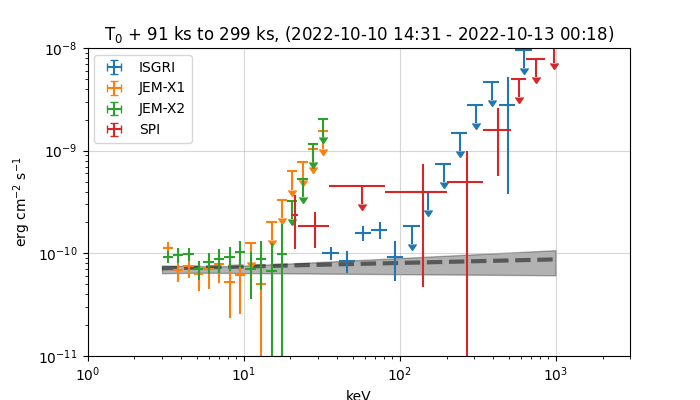

In [21]:
import ogip.tools

import importlib
importlib.reload(ogip.tools)
from astropy import units as u


from ogip.spec import PHAI, RMF, rebin, log_bins
from ogip.tools import plot as plot_spec



# isgri_pha = PHAI.from_file_name("IBIS_spectrum_GRB221009A.fits")
# isgri_rmf = RMF.from_file_name("IBIS_rmf_GRB221009A.fits")

isgri_pha_rebinned, isgri_rmf_rebinned = rebin(isgri_pha, isgri_rmf, log_bins(10, 25, 700))

spi_pha_rebinned, spi_rmf_rebinned = rebin(spi_pha, spi_rmf, log_bins(3, 25, 1000))
# spi_pha_rebinned, spi_rmf_rebinned = rebin(spi_pha, spi_rmf, log_bins(5, 25, 600))


model = lambda x:(7e-5*(x/25.)**-2)

import logging
logger = logging.getLogger()

def model_generator(p):
    logger.debug("generating model for %s", p)

    def mdl(x):
        logger.debug("evaluating model for %s", p)
        if len(p) == 1:
            return (p[0]*(x/25.)**-2)
        else:
            return (p[0]*(x/25.)**p[1])

    return mdl



allspec = [
    (jmx1_pha, jmx1_rmf, jmx1_arf, (jmx1_rmf._e_min > 2) & (jmx1_rmf._e_min < 15)),
    (jmx2_pha, jmx2_rmf, jmx2_arf, (jmx2_rmf._e_min > 2) & (jmx2_rmf._e_min < 15)),
    (isgri_pha, isgri_rmf, None, (isgri_rmf._e_min > 28) & (isgri_rmf._e_min < 200)),
    (spi_pha, spi_rmf, None, (spi_rmf._e_min > 15) & (spi_rmf._e_min < 300)),
]

import numpy as np

# fit_result, fitted_model = ogip.tools.fit(model_generator, [7e-5, -1.9], jmx1_pha, jmx1_rmf, None, 
#                                           mask=(jmx1_rmf._e_min > 5) & (jmx1_rmf._e_min < 20))

# model_generator = lambda p:(lambda x:(p[0]*(x/25.)**-2))
# fit_result, fitted_model = ogip.tools.fit(model_generator, [7e-10], isgri_pha, isgri_rmf, None, 
#                                           mask=(isgri_rmf._e_min > 35) & (isgri_rmf._e_min < 100))


# model_generator = lambda p:(lambda x:(p[0]*(x/25.)**-2))
fit_result, fitted_model = ogip.tools.fit(model_generator, [1e-9, -2], 
                                          allspec,
                                        #   method='L-BFGS-B'
                                          method='L-BFGS-B'
                                          )

print(fit_result)        


p0 = [1e-9, -2]

f0 = np.log10(fit_result.x[0])

def model_with_pars(x, p):    
    logger.debug("evaluating model for %s", p)
    if len(p) == 1:
        return (10**p[0]*(x/25.)**-2)
    else:
        return (10**p[0]*(x/25.)**p[1])
    
r = ogip.tools.sample(model_with_pars, p0=[(f0, f0 - 0.3, f0 + 0.3), (-2, -2.5, -1.5)], spectra=allspec, nsteps=sampler_steps, nwalkers=50, n_processes=1)

tau = r.get_autocorr_time(tol=1)

flat_samples = r.get_chain(discard=int(max(tau))*2, thin=15, flat=True)

p_best = r.flatchain[np.argmax(r.flatlnprobability)]
fitted_model = lambda x:model_with_pars(x, p_best)

model = fitted_model                                        

for unfolded in True, False:
# for unfolded in False,:
    f = plt.figure(figsize=(7, 4))

    
# for unfolded in False, :
    e_power = 2 if unfolded else 0

    en = np.logspace(np.log10(3), 3)
    models = []
    for p in flat_samples[::10]:
        models.append(model_with_pars(en, p))
    models = np.array(models)

    plt.fill_between(
        en,
        *(np.percentile(models, (5, 95), axis=0)*en**2*u.keV.to(u.erg)),
        alpha=0.3,
        color='k'        
    )


    plt.plot(en, fitted_model(en)*en**2*u.keV.to(u.erg), lw=3, c='k', alpha=0.5, ls="--")

    from astropy import units as u
    erg_in_keV = u.keV.to(u.erg)

    # plot_spec(isgri_pha, model, isgri_rmf, fig=f, label_prefix="ISGRI", unfolded=unfolded, e_power=e_power)
    plot_spec(isgri_pha_rebinned, model, isgri_rmf_rebinned, fig=f, unfolded=unfolded, e_power=e_power, scale_factor=erg_in_keV,
            plot_kwargs=dict(label="ISGRI"))

    isgri_pha_rebinned.to_fits("isgri_rebinned_pha.fits")
    isgri_rmf_rebinned.to_fits("isgri_rebinned_rmf.fits")

    # plot_spec(spi_pha_rebinned, model, spi_rmf_rebinned, fig=f, label_prefix="SPI", unfolded=unfolded, e_power=e_power)

            
    plot_spec(jmx1_pha, model, jmx1_rmf, arf=jmx1_arf, fig=f, unfolded=unfolded, e_power=e_power, scale_factor=erg_in_keV, 
            plot_kwargs=dict(label="JEM-X1"))
    plot_spec(jmx2_pha, model, jmx2_rmf, arf=jmx2_arf, fig=f, label_prefix="JMX2", unfolded=unfolded, e_power=e_power, scale_factor=erg_in_keV,
            plot_kwargs=dict(label="JEM-X2"))

    if 'r25589' in focus_obs_name:
        plot_spec(spi_pha, model, spi_rmf, fig=f, plot_kwargs=dict(label="SPI"), unfolded=unfolded, e_power=e_power, scale_factor=erg_in_keV)
    
    # early and total jemxX spec are weird

    if unfolded:
        plt.ylabel(f"erg cm$^{{-2}}$ s$^{{-1}}$" + (f" keV$^{{{e_power-2}}}$" if e_power!=2 else ""))
    else:
        plt.ylabel("counts/s/keV")

    plt.xlabel("keV")

    plt.xlim([1, 3e3])
    plt.ylim([1e-11, 1e-8])
    # plt.loglog()

    plt.grid(alpha=0.5)

    # plt.title(f"{focus_obs_name} {spec2isot12(jmx1_pha)}\n {spec2isot12(isgri_pha)} {fit_result.x} {fitted_model}")
    # t1, t2 = spec2isot12(jmx1_pha)
    t1, t2 = v['output_values']['data']['tstart_isot'], v['output_values']['data']['tstop_isot']

    t2pl = lambda t:t.replace("T", " ")[:16]
    t2pl_t0sec = lambda t:(Time(t) - T0).sec


    plt.title(f"T$_0$ + {round(1e-3*t2pl_t0sec(t1)):d} ks to {round(1e-3*t2pl_t0sec(t2)):d} ks, ({t2pl(t1)} - {t2pl(t2)})")

    plt.legend()



    fn_png = f"spec_afterglow_counts_{'un' if unfolded else ''}folded.png"
    plt.savefig(fn_png.replace(".png", ".pdf"))
    plt.savefig(fn_png)


from IPython.display import Image
Image("spec_afterglow_counts_unfolded.png")
# Image("spec_afterglow_counts_folded.png")

    # TODO: add in grey other data
    # TODO: plot by period

In [12]:
r.flatchain.shape,  r.flatlnprobability.shape

((2500, 2), (2500,))

In [13]:

fitted_model(5)

0.0018113710381315793

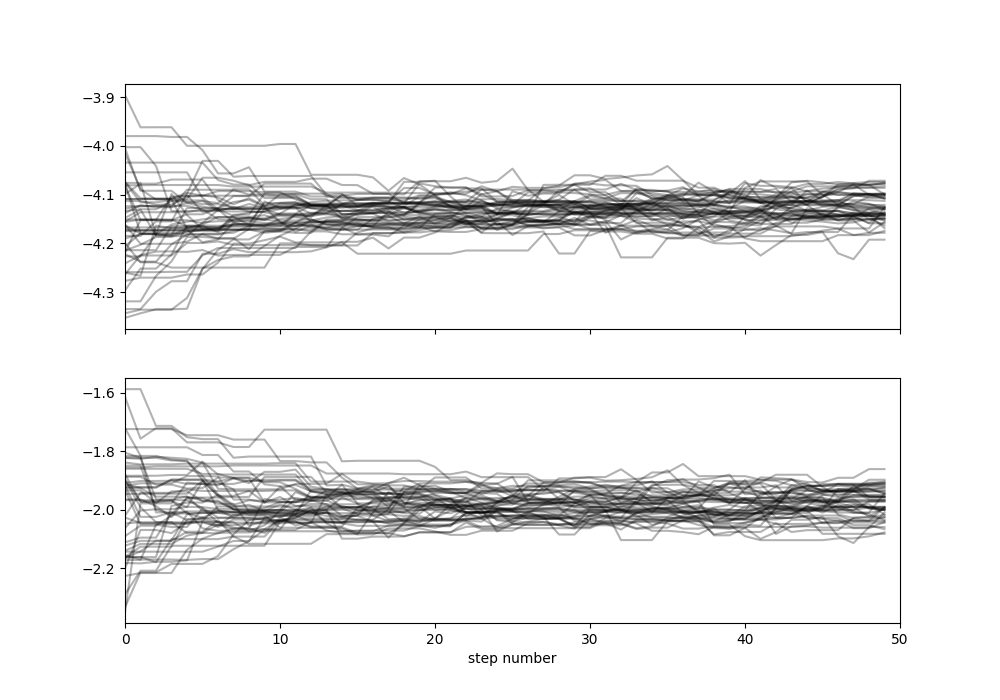

In [14]:
importlib.reload(ogip.tools)
ogip.tools.plot_chain(r)
plt.savefig("chain.png")
Image("chain.png")

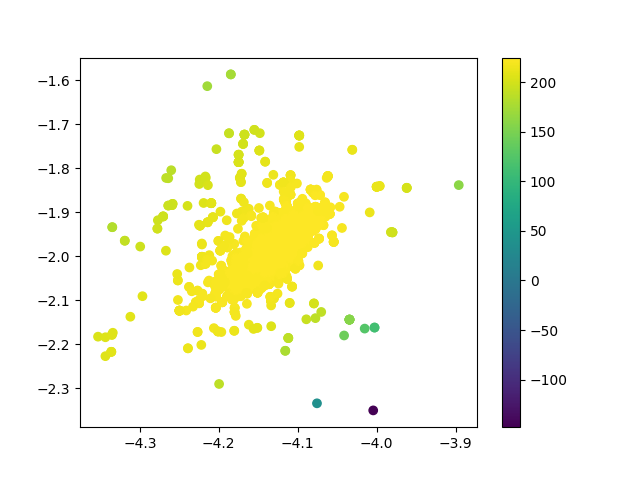

In [15]:
plt.figure()

m = r.flatlnprobability > -500

plt.scatter(
    r.flatchain[m,0],
    r.flatchain[m,1],
    c=r.flatlnprobability[m]
)

plt.colorbar()

plt.savefig("corner.png")
Image("corner.png")


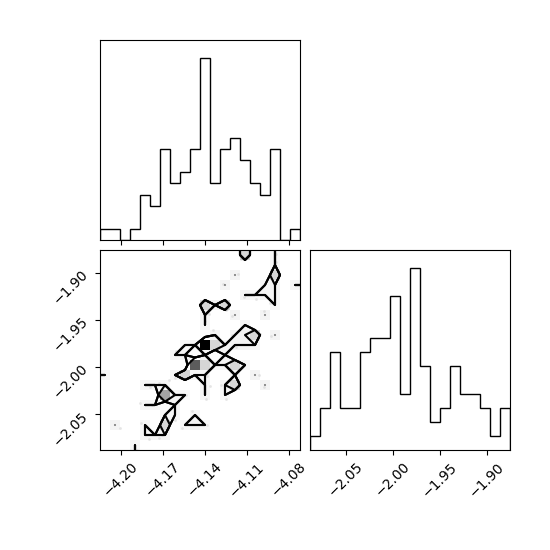

In [16]:
from corner import corner

corner(flat_samples)
plt.savefig("corner.png")
Image("corner.png")

In [17]:
from scipy.integrate import quad

def flux_for_pars(p, e1=3, e2=200):
    return quad(lambda x:model_with_pars(x, p)*x*u.keV.to(u.erg), e1, e2)[0]

fluxes = [flux_for_pars(p) for p in flat_samples]
peak = flux_for_pars(r.flatchain[np.argmax(r.flatlnprobability)])

flux_3_200_keV_ecs = {
    'mean': peak,
    'stat_err_minus': peak - np.percentile(fluxes, 5),
    'stat_err_plus': - peak + np.percentile(fluxes, 95),
}

flux_3_200_keV_ecs 

{'mean': 3.221226580676626e-10,
 'stat_err_minus': 4.3682571777490286e-11,
 'stat_err_plus': 1.8928252589992832e-11}

In [18]:
fit_pars = {}

for n, m, p in zip(["N", "slope"], np.mean(flat_samples, axis=0), np.percentile(flat_samples, (5, 95), axis=0).transpose()):
    print(n, m, p)
    fit_pars[n] = {
        'mean': m,
        'stat_err_minus': m - p[0],
        'stat_err_plus': - m + p[1],
    }

fit_pars

N -4.135835685346358 [-4.18039893 -4.09278281]
slope -1.9877288288438422 [-2.0648148  -1.90590138]


{'N': {'mean': -4.135835685346358,
  'stat_err_minus': 0.04456324876468898,
  'stat_err_plus': 0.04305287225112586},
 'slope': {'mean': -1.9877288288438422,
  'stat_err_minus': 0.07708597229626335,
  'stat_err_plus': 0.08182745126724189}}

In [19]:
if focus_obs_name == "r2558":
    """
    Parameter   Confidence Range (2.706)
     1      1.98567      2.13624    (-0.0718247,0.0787513)

    Error range   0.02757 - 0.02998    (4.498e-10 - 5.034e-10)  (68.00% confidence)
    """

In [20]:
sn_max = 0 # np.max(d['RATE'] / d['STAT_ERR'])
sn = 0 # np.max(d['RATE'] / d['STAT_ERR'])
sn_total = 0 # np.sum(d['RATE']) / np.sum(d['STAT_ERR']**2)**0.5
exposure = 0 # spec[2].header['EXPOSURE']
ag_spec="spec_afterglow_counts_unfolded.pdf"
flux_3_200_keV_ecs=flux_3_200_keV_ecs
fit_pars=fit_pars